# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import and setup denpendencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json


# weather api keyimport
from api_keys import weather_api_key

#import citipy
from citipy import citipy

#outputfile
output_data_file="output_data/cities.csv"

#Range of lattitudes and longtitudes
lat_range=(-90,90)
lng_range=(-180,180)

## Generate Cities List

In [2]:
#creatings lists to hold cooridnates and cities
coordinates=[]
cities=[]
#create coorinates with random sampling
lat=np.random.uniform(low=-90.000, high=90.000, size=1500)
lng=np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates=zip(lat,lng)
#search for nearest city in the coordinates
for coordinates in coordinates:
    city=citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #add only the unique cities to our list
    if city not in cities:
        cities.append(city)

len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#append the base url, units and combine to get the query url
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#create empty lists to store the data for each field
city_id_list=[]
city_name_list=[]
country_list=[]
lng_list=[]
lat_list=[]
temp_list=[]
humidity_list=[]
clouds_list=[]
wind_speed_list=[]

#loop through the cities
for city in cities:
    
    #Fetch the JSON response from the Oenweather API
    response_json=requests.get(query_url+city).json()
    
    #Retrieve the items for each field and append them to the empty lists
    try:
        city_id=response_json['id']
        city_id_list.append(city_id)
        
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        
        print(f"City Name: {city}, City ID: {city_id}")
    
    #skip the error prone results and move on to next city
    except:
        
        print("That record does not exist, searching for next record...")

City Name: manacor, City ID: 2514216
City Name: umm kaddadah, City ID: 364933
City Name: agadez, City ID: 2448083
City Name: tautira, City ID: 4033557
City Name: shwebo, City ID: 1296736
City Name: kapaa, City ID: 5848280
City Name: nioro, City ID: 2412408
City Name: bonthe, City ID: 2409914
City Name: gamba, City ID: 2400547
City Name: roma, City ID: 5134295
City Name: atuona, City ID: 4020109
That record does not exist, searching for next record...
City Name: abha, City ID: 110690
City Name: constitucion, City ID: 3893726
City Name: busselton, City ID: 2075265
City Name: half moon bay, City ID: 5354943
City Name: rikitea, City ID: 4030556
City Name: portland, City ID: 5746545
City Name: east london, City ID: 1006984
City Name: punta arenas, City ID: 3874787
That record does not exist, searching for next record...
City Name: saint george, City ID: 5546220
City Name: belmonte, City ID: 3470137
City Name: ponta do sol, City ID: 2264557
City Name: cape town, City ID: 3369157
City Name: u

City Name: taga, City ID: 665628
City Name: vidim, City ID: 2013406
City Name: katete, City ID: 227592
City Name: sedniv, City ID: 694715
City Name: west milford, City ID: 5106279
City Name: iqaluit, City ID: 5983720
City Name: ilulissat, City ID: 3423146
City Name: hun, City ID: 2216645
City Name: tiksi, City ID: 2015306
City Name: portobelo, City ID: 3702577
That record does not exist, searching for next record...
City Name: shimoda, City ID: 1852357
City Name: labuhan, City ID: 8079926
City Name: vestmanna, City ID: 2610343
City Name: linguere, City ID: 2249281
City Name: talnakh, City ID: 1490256
City Name: gorontalo, City ID: 1643837
City Name: kosh-agach, City ID: 1502422
City Name: egvekinot, City ID: 4031742
City Name: narsaq, City ID: 3421719
City Name: odweyne, City ID: 53372
City Name: dicabisagan, City ID: 1715015
City Name: juneau, City ID: 5554072
City Name: victor harbor, City ID: 2059470
City Name: fairbanks, City ID: 5861897
That record does not exist, searching for ne

That record does not exist, searching for next record...
City Name: komsomolskiy, City ID: 1513491
City Name: batagay, City ID: 2027044
City Name: nelson bay, City ID: 2155562
City Name: gresham, City ID: 5729485
City Name: elko, City ID: 5703673
City Name: san marcos, City ID: 5392368
That record does not exist, searching for next record...
City Name: corning, City ID: 5113760
City Name: verkhnyaya toyma, City ID: 474470
City Name: ratnagiri, City ID: 1258338
City Name: miyako, City ID: 2111884
City Name: tateyama, City ID: 1850523
City Name: lithakia, City ID: 258241
City Name: san carlos de bariloche, City ID: 7647007
That record does not exist, searching for next record...
City Name: san quintin, City ID: 3984997
City Name: yenangyaung, City ID: 1285173
City Name: goderich, City ID: 5962442
City Name: arman, City ID: 2127060
City Name: akureyri, City ID: 2633274
City Name: dukat, City ID: 2125906
City Name: la roda, City ID: 2515555
City Name: mikuni, City ID: 1857260
City Name: er

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2514216,Manacor,ES,39.5696,3.2096,68.18,77,0,4.41
1,364933,Umm Kaddadah,SD,13.6017,26.6876,82.92,51,13,3.83
2,2448083,Agadez,NE,19.7500,10.2500,77.13,20,4,9.04
3,4033557,Tautira,PF,-17.7333,-149.1500,80.62,74,19,20.54
4,1296736,Shwebo,MM,22.5667,95.7000,77.31,91,100,6.08


In [7]:
# Export to .csv file
cities_df.to_csv("Output/city_weather.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot


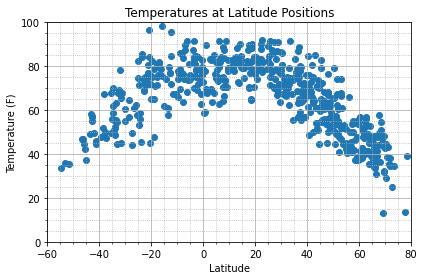

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_temp.png")

In [ ]:
# Inference
# As we near the equator the temperature tends to be the highest among the other lattitudes.

## Latitude vs. Humidity Plot

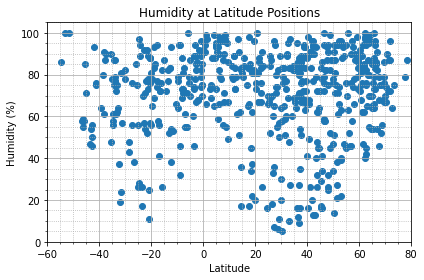

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_humid.png")

In [ ]:
# Inference
# There seems to be no correlation between humidity and lattitude as the data points are spread throughout the field.

## Latitude vs. Cloudiness Plot

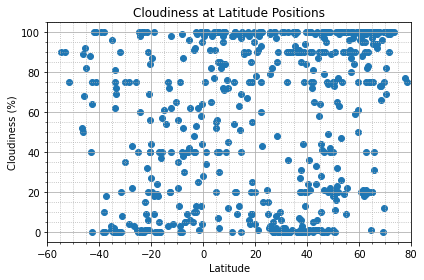

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_clouds.png")

In [ ]:
# Inference
# There seems to be no correlation between cloudiness and lattitude as the data points are spread throughout the field.

## Latitude vs. Wind Speed Plot

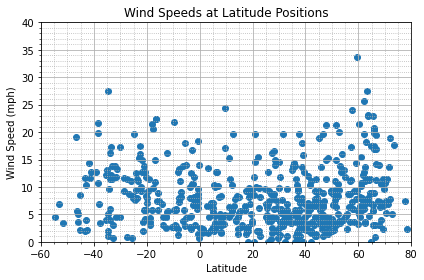

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_wind.png")

In [ ]:
# Inference
# It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get.

## Linear Regression

In [23]:
# Create Northern and Southern hemisphere halves dataframe
halves = cities_df['Lat'] > 0
northern_hemisphere = cities_df[halves]
southern_hemisphere = cities_df[~halves]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

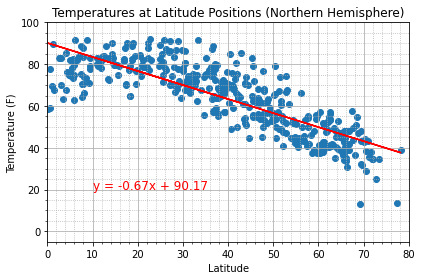

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

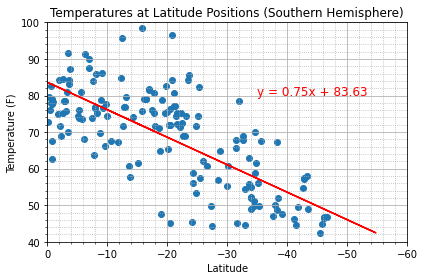

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/sh_lat_temp_regression.png")

In [ ]:
# Inference
# Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

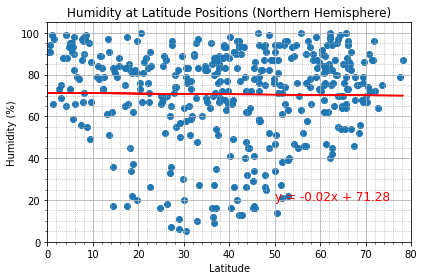

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

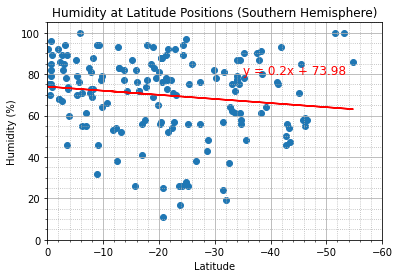

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Output/sh_lat_humid_regression.png")

In [ ]:
# Inference
# There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

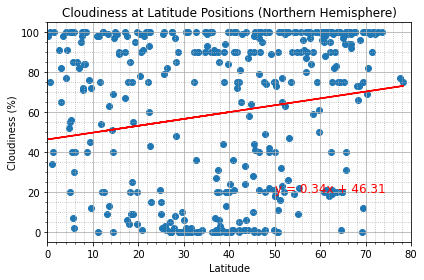

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

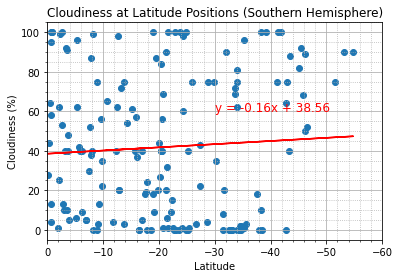

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Output/sh_lat_clouds_regression.png")

In [ ]:
# Inference
# There does not seem to be much correlation between cloudiness and latitude when you look at the plots.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

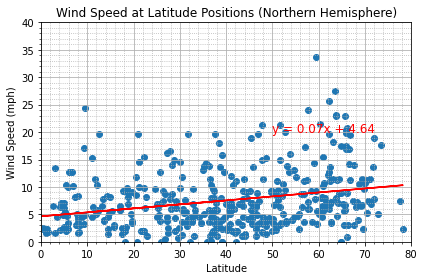

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

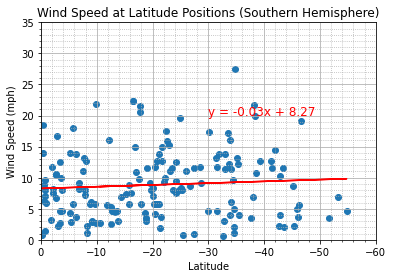

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Output/sh_lat_wind_regression.png")


In [ ]:
# Inference
# Strong correlation between the wind speed and lattidtude. The slope looks much flatter.